In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from sklearn.preprocessing import StandardScaler  
import random
import seaborn as sns

# **WINEQUALITY RED AND WHITE**

In [31]:
red = pd.read_csv(r"https://raw.githubusercontent.com/KevinFDI/IML_Practica_2/main/datasets/winequality-red.csv")
white = pd.read_csv(r"https://raw.githubusercontent.com/KevinFDI/IML_Practica_2/main/datasets/winequality-white.csv")

**ANALIZO LA INFORMACIÓN DEL DATASET**

In [32]:
round(red.head(10), 2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.00,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.00,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.00,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.08,17.0,60.0,1.00,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.00,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.08,13.0,40.0,1.00,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.07,15.0,59.0,1.00,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.06,15.0,21.0,0.99,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.07,9.0,18.0,1.00,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.07,17.0,102.0,1.00,3.35,0.80,10.5,5


In [33]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [34]:
round(white.head(10), 2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.04,45.0,170.0,1.00,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.05,14.0,132.0,0.99,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.05,30.0,97.0,1.00,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.06,47.0,186.0,1.00,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.06,47.0,186.0,1.00,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.05,30.0,97.0,1.00,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.04,30.0,136.0,0.99,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.04,45.0,170.0,1.00,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.05,14.0,132.0,0.99,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.04,28.0,129.0,0.99,3.22,0.45,11.0,6


In [35]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**HISTOGRAMAS**

HISTOGRAMA WINE QUALITY RED

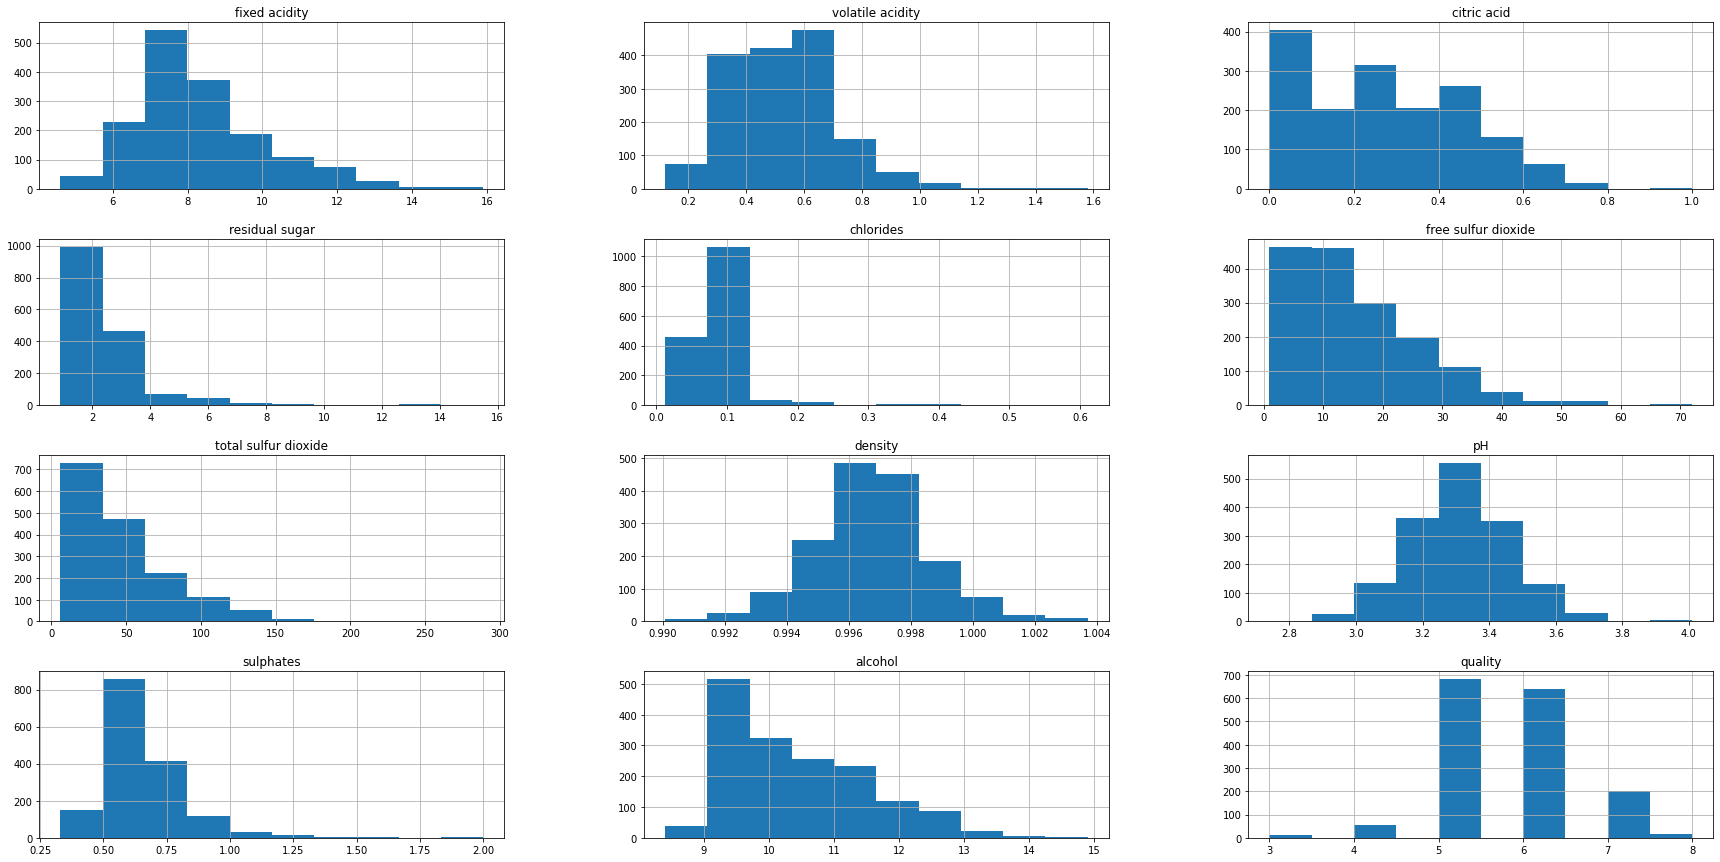

In [36]:
red.hist(figsize=(30,15));

HISTOGRAMA WINE QUALITY RED DE QUALITY

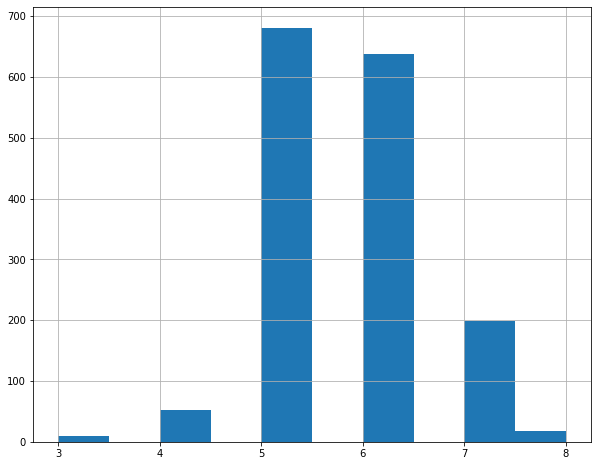

In [37]:
red['quality'].hist(figsize=(10,8));

HISTOGRAMA WINE QUALITY WHITE

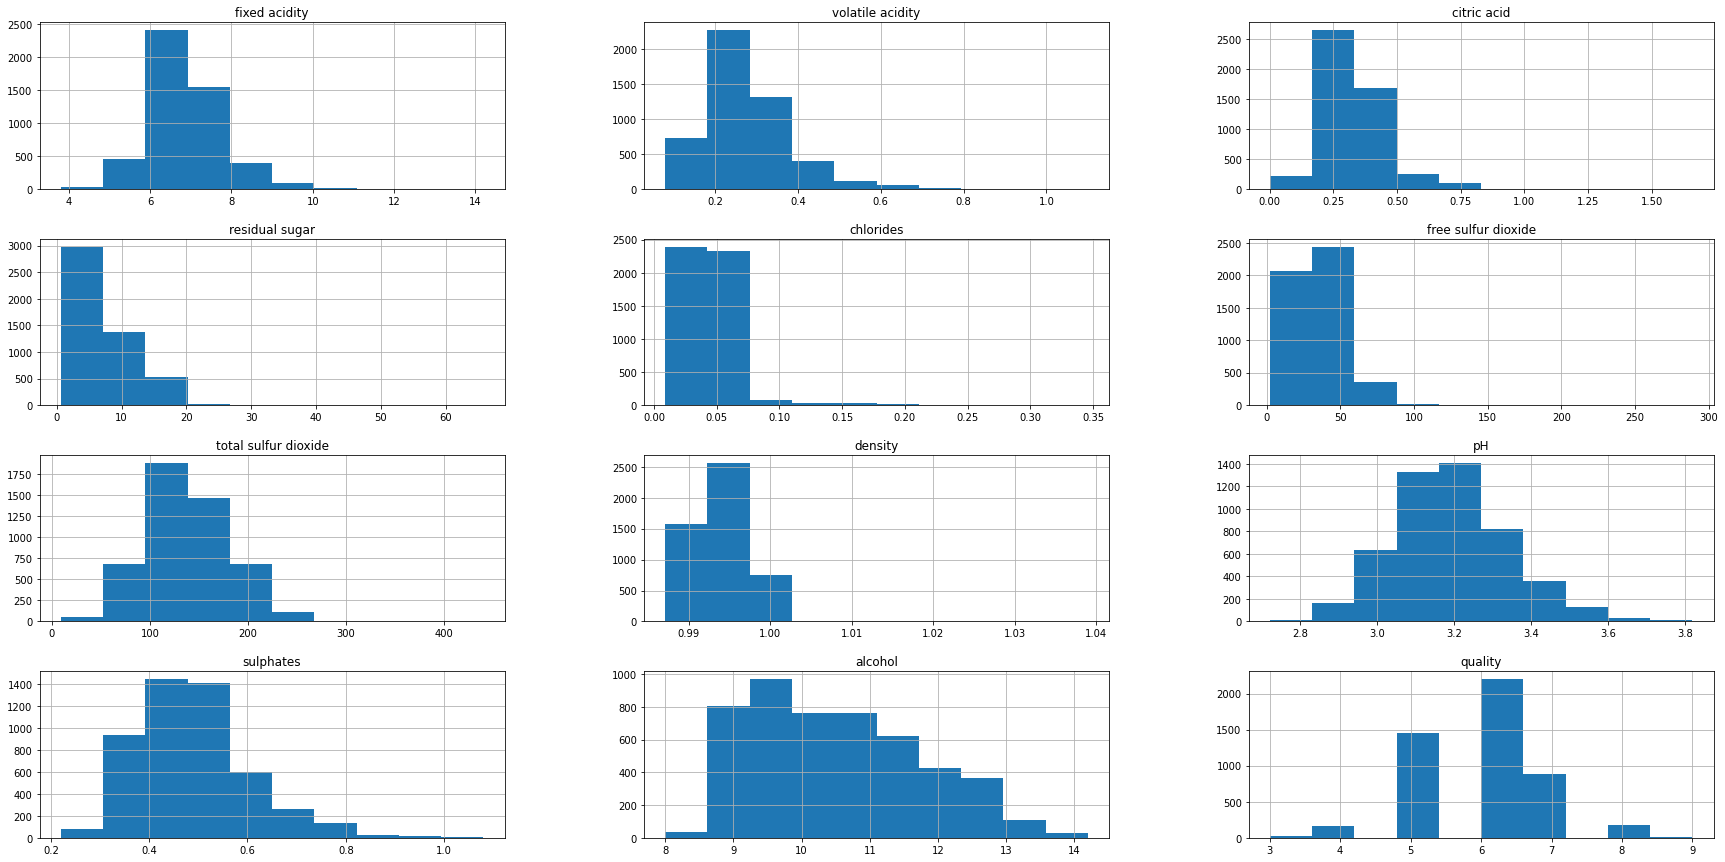

In [38]:
white.hist(figsize=(30,15));

HISTOGRAMA WINE QUALITY WHITE DE QUALITY

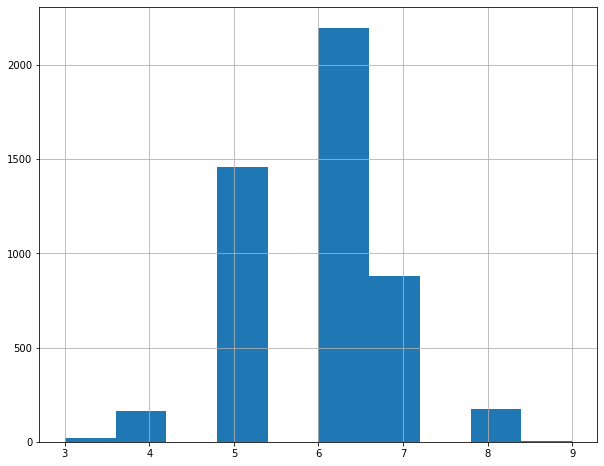

In [39]:
white['quality'].hist(figsize=(10,8));

**MATRICES DE CORRELACIÓN**

MATRIZ DE CORRELACIÓN WINE QUALITY RED

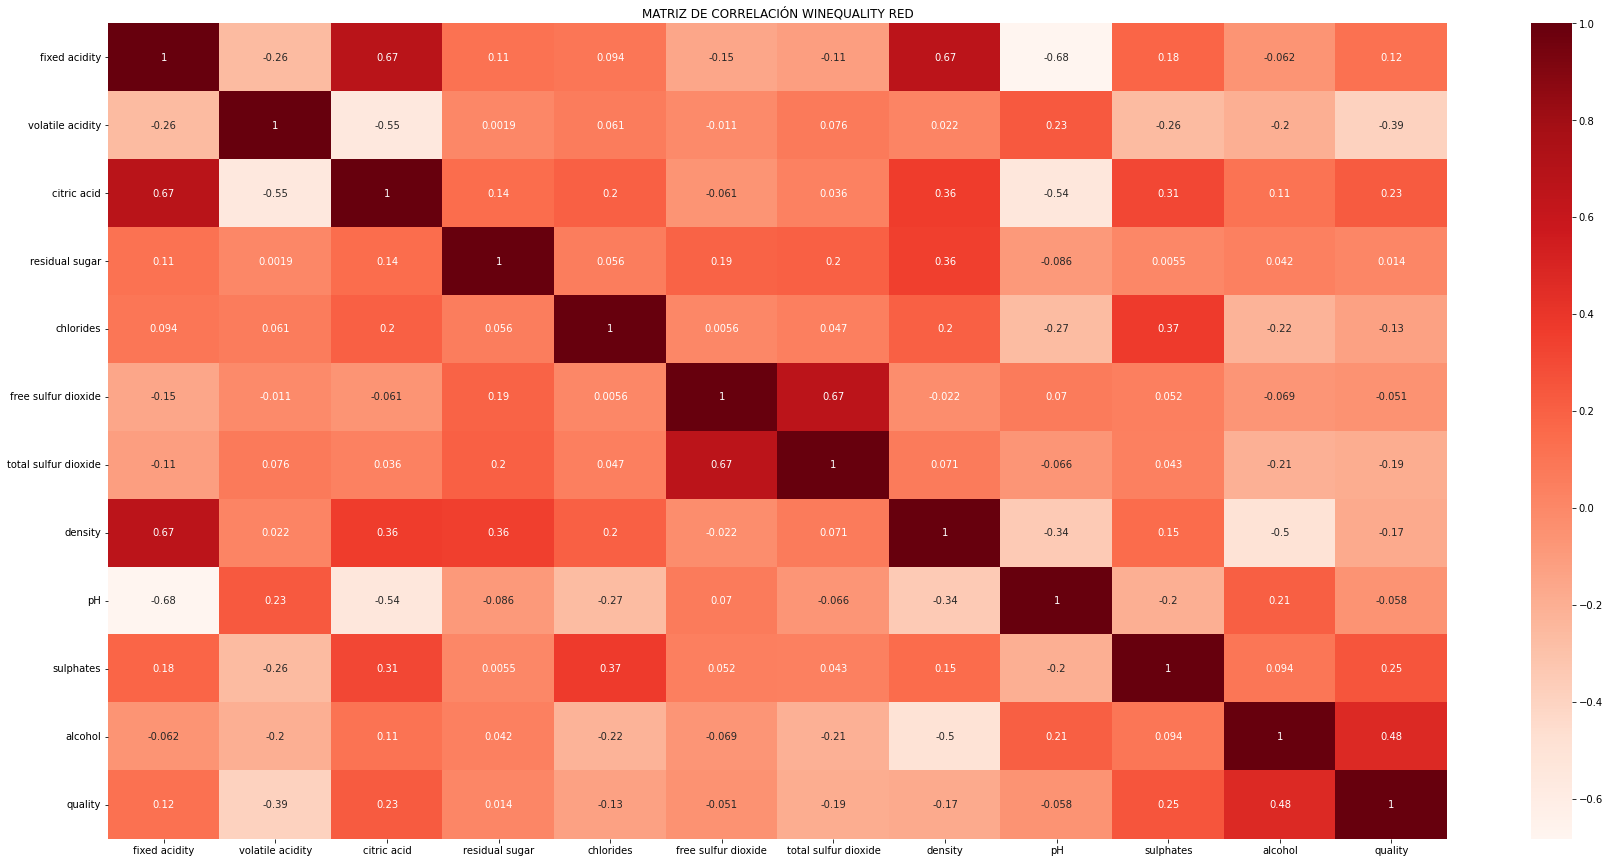

In [40]:
plt.figure(figsize=(30,15))
sns.heatmap(red.corr(),annot=True,cmap='Reds').set_title('MATRIZ DE CORRELACIÓN WINEQUALITY RED')
plt.show()

MATRIZ DE CORRELACIÓN WINE QUALITY WHITE

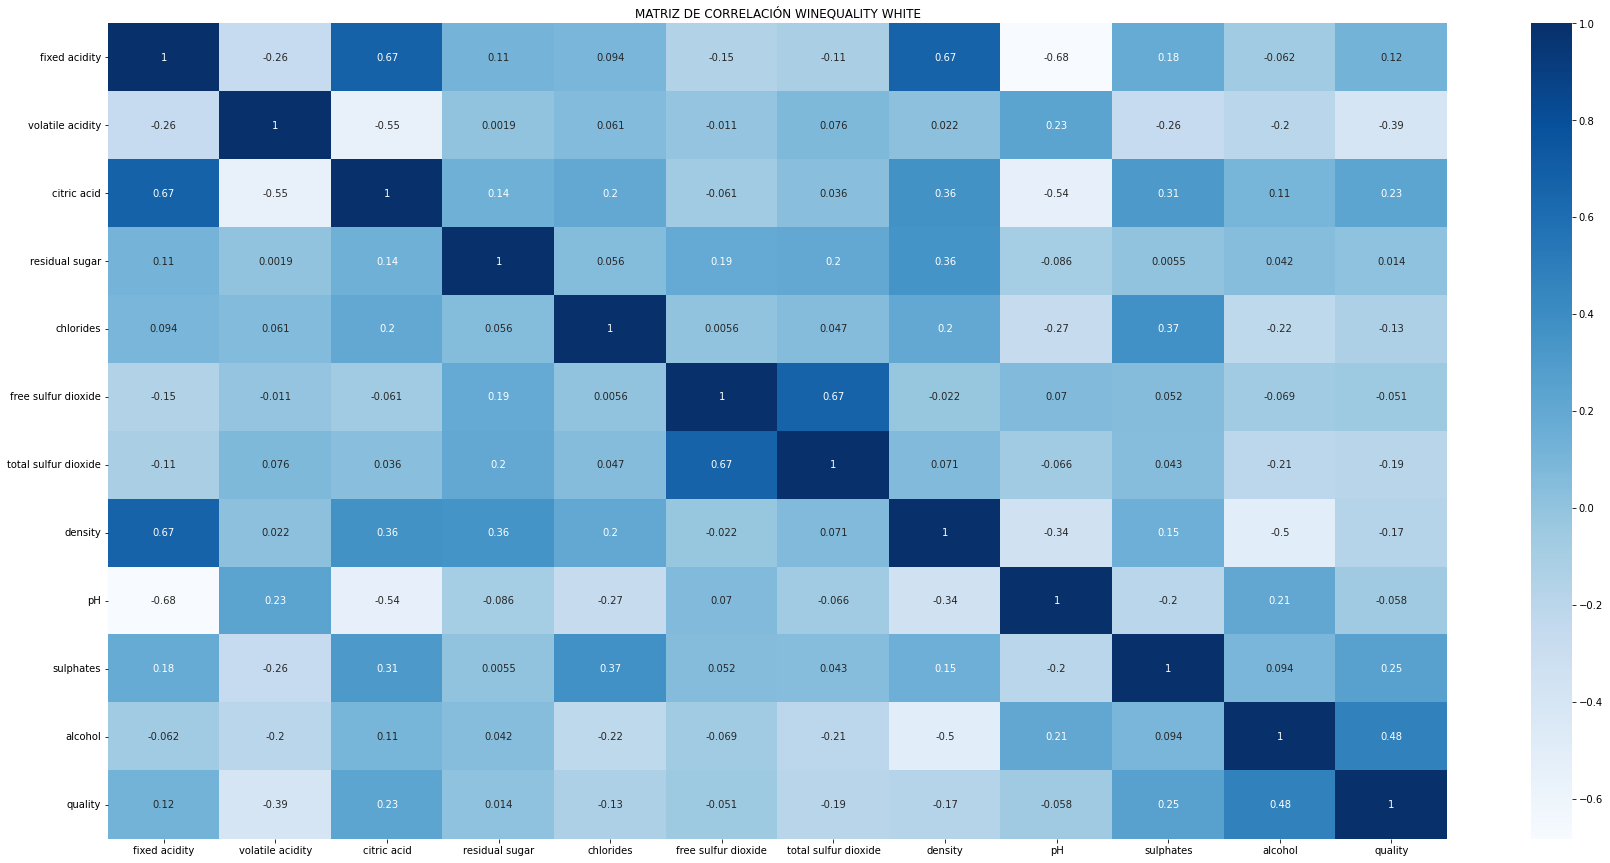

In [41]:
plt.figure(figsize=(30,15))
sns.heatmap(red.corr(),annot=True,cmap='Blues').set_title('MATRIZ DE CORRELACIÓN WINEQUALITY WHITE')
plt.show()

**DEFINO LAS VARIABLES DE LOS DATASETS PARA NORMALIZARLOS**

WINE QUALITY RED = 1

In [42]:
# Identifico a el dataset de Red con un 1
x1 = red.drop(['quality'], axis=1)
y1 = red['quality']
n, d = x1.shape
print("El dataset Winequalit red tiene %d registros, de %d dimensiones" %(n, d))

El dataset Winequalit red tiene 1599 registros, de 11 dimensiones


WINE QUALITY WHITE = 2

In [43]:
# Identifico a el dataset de White con un 2
x2 = white.drop(['quality'], axis=1)
y2 = white['quality']
n, d = x2.shape
print("El dataset Winequalit white tiene %d registros, de %d dimensiones" %(n, d))

El dataset Winequalit white tiene 4898 registros, de 11 dimensiones


**NORMALIZACIÓN**

**WINE QUALITY RED**

In [44]:
NORMALIZAR_1 = 1
if (NORMALIZAR_1):
    scaler_1 = StandardScaler()  
    scaler_1.fit(x1)  
    x1 = scaler_1.transform(x1)

ENTRENAR EL MODELO DE REGRESIÓN LINEAL

Crear el objeto modelo de regresión lineal

In [45]:
modelo_1 = LinearRegression()

ENTRENA

In [46]:
modelo_1.fit(x1, y1)

LinearRegression()

Utilizar el modelo entrenado para predecir nuevos valores

In [47]:
y1_predict= modelo_1.predict(x1)

Calculo del error del modelo

Calculamos el error cuadrático medio y el error absoluto medio para el modelo entrenado

In [48]:
mse_error1 = mean_squared_error(y1_predict, y1)
print("Error cuadrático medio: %.2f" % mse_error1)

mae_error1 = mean_absolute_error(y1_predict, y1)
print("Error absoluto medio: %.2f" % mae_error1)

r2_s1 = r2_score(y1, y1_predict) # Devuelve como se ajustan estas dos variables.
print("r2_score: %.2f" % r2_s1)

Error cuadrático medio: 0.42
Error absoluto medio: 0.50
r2_score: 0.36


**WINE QUALITY WHITE**

In [49]:
NORMALIZAR_2 = 1
if (NORMALIZAR_2):
    scaler_2 = StandardScaler()  
    scaler_2.fit(x2)  
    x2 = scaler_2.transform(x2)

ENTRENAR EL MODELO DE REGRESIÓN LINEAL

Crear el objeto modelo de regresión lineal

In [50]:
modelo_2 = LinearRegression()

ENTRENA

In [51]:
modelo_2.fit(x2, y2)

LinearRegression()

Utilizar el modelo entrenado para predecir nuevos valores

In [52]:
y2_predict= modelo_2.predict(x2)

In [53]:
mse_error2 = mean_squared_error(y2_predict, y2)
print("Error cuadrático medio: %.2f" % mse_error2)

mae_error2 = mean_absolute_error(y2_predict, y2)
print("Error absoluto medio: %.2f" % mae_error2)

r2_s2 = r2_score(y2, y2_predict) # Devuelve como se ajustan estas dos variables.
print("r2_score: %.2f" % r2_s2)

Error cuadrático medio: 0.56
Error absoluto medio: 0.58
r2_score: 0.28


**CONCLUSIÓN Y OBSERVACIÓN DE LOS ERRORES DE AMBOS DATASETS**:

El **error cuadrático medio** es el promedio de la diferencia cuadrática entre la predicción del modelo y el valor de destino. Cuanto más pequeño es un valor ECM, más cercanos son los valores predichos y observados.

El **error absoluto medio** es el promedio de la diferencia absoluta entre la predicción del modelo y el valor de destino

*   Tendencia al alza: Una tendencia al alza indica que la métrica se está deteriorando. Los datos de comentarios ya son significativamente distintos respecto a los datos de entrenamiento.
*   Tendencia a la baja: Una tendencia a la baja indica que la métrica está mejorando. Esto significa que el reentrenamiento del modelo es efectivo.
*   Variación errática o irregular: Una variación errática o irregular indica que los datos de comentarios no son coherentes entre evaluaciones. Incremente el tamaño mínimo de la muestra para el supervisor de calidad.


# **A) Con esto concluyo que si bien los errores entre ambos datasets son parecidos y cercanos, es más preciso el del Wine Quality Red.**

**PLOT COEFICIENTES**

Coeficientes del modelo (parámetros)

WINE QUALITY RED

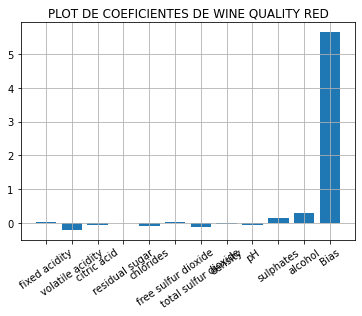

In [59]:
w1 = modelo_1.coef_
b1 = modelo_1.intercept_
d1 = x1.shape[1]
plt.bar(range(d1+1), np.concatenate((w1,[b1])));
labels_1 = red.columns.values; labels_1[-1]= 'Bias'
plt.xticks(range(w1.shape[0]+1), labels_1, rotation= 35)
plt.grid()
plt.title("PLOT DE COEFICIENTES DE WINE QUALITY RED");

WINE QUALITY WHWITE

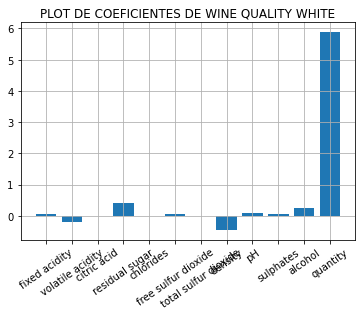

In [62]:
w2 = modelo_2.coef_
b2 = modelo_2.intercept_
d2 = x2.shape[1]
plt.bar(range(d2+1), np.concatenate((w2,[b2])));
labels_2 = white.columns.values; labels_2[-1]= 'quantity'
plt.xticks(range(w2.shape[0]+1), labels_2, rotation= 35)
plt.grid()
plt.title("PLOT DE COEFICIENTES DE WINE QUALITY WHITE");

**PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS**

En el eje "x" están los valores reales, mientras que en el eje "y" los predichos para todos los datos del dataset.

WINE QUALITY RED

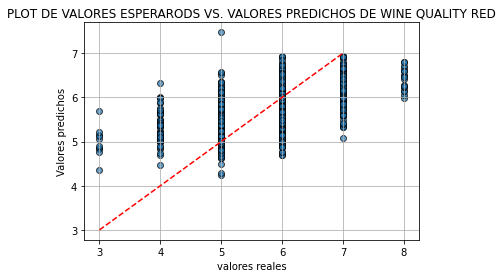

In [63]:
plt.figure()
xx1 = range(round(y1.min()),round(y1.max()))
plt.scatter(y1, y1_predict,alpha = 0.7, edgecolor = 'k'), plt.grid()
plt.plot(xx1, xx1, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT DE VALORES ESPERARODS VS. VALORES PREDICHOS DE WINE QUALITY RED");

WINE QUALITY WHITE

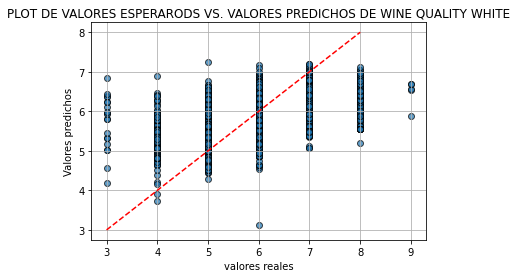

In [64]:
plt.figure()
xx2 = range(round(y2.min()),round(y2.max()))
plt.scatter(y2, y2_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx2, xx2, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT DE VALORES ESPERARODS VS. VALORES PREDICHOS DE WINE QUALITY WHITE");

**EVALUACIÓN DEL MODELO CON NUEVO DATO**

WINE QUALITY RED

In [65]:
index_i1 = random.randint(0, x1.shape[0]-1) # Toma un índice aleatorio de la base de datos, agarrarlo y predecir.
x1_nuevo = np.zeros((1,d1))
x1_nuevo[0] = x1[index_i1, :]
y1_real = y1[index_i1]
y1_predict = modelo_1.predict(x1_nuevo)
x1_nuevo_sin_norm = scaler_1.inverse_transform(x1_nuevo)

print("\nNuevo dato (%d):" % (index_i1))
print("El modelo predice: %f " % (y1_predict))
print("El valor real es: %f" % (y1_real))


Nuevo dato (906):
El modelo predice: 5.663131 
El valor real es: 5.000000


WINE QUALITY WHITE

In [66]:
index_i2 = random.randint(0, x1.shape[0]-1) # Toma un índice aleatorio de la base de datos, agarrarlo y predecir.
x2_nuevo = np.zeros((1,d2))
x2_nuevo[0] = x2[index_i2, :]
y2_real = y2[index_i2]
y2_predict = modelo_2.predict(x2_nuevo)
x2_nuevo_sin_norm = scaler_2.inverse_transform(x2_nuevo)

print("\nNuevo dato (%d):" % (index_i2))
print("El modelo predice: %f " % (y2_predict))
print("El valor real es: %f" % (y2_real))


Nuevo dato (959):
El modelo predice: 5.623508 
El valor real es: 6.000000


**OBSERVACIÓN**: En ambos casos, en promedio el modelo debería comportarse medianamente bien.

# **B) El error es menor para "qualities" cercanas a 6 debido a que entre 5 y 7 se encuentra concentrada la mayor cantidad de datos ingresados al datasets.**

Esto se puede observar a lo largo de los gráficos que fui realizando pero más precisamente en estos dos en particular:

WINE QUALITY RED

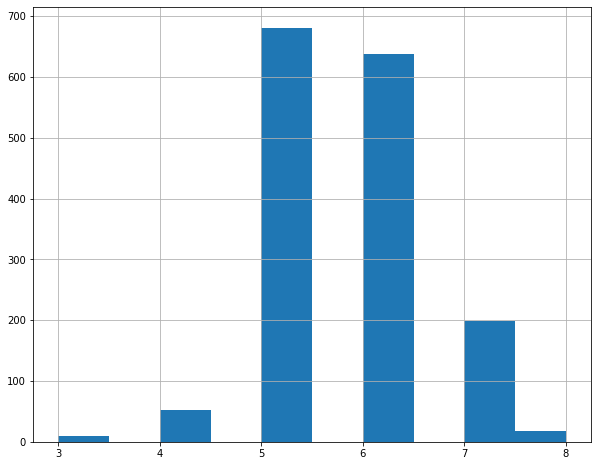

In [72]:
red['quality'].hist(figsize=(10,8));

WINE QUALITY WHITE

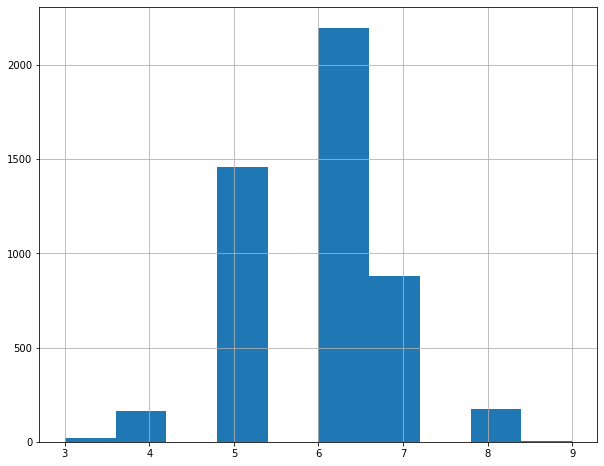

In [71]:
white['quality'].hist(figsize=(10,8));